###**Project-Name: Exploratory Data Analysis of used car VW**
Analysis plan: 

1.   Categorical analysis (bar plot)
2.   Numerical analysis (scatter, histogram, distribution, ECDF, box plot and violin plot)





In [44]:
# importing data analysis libraries
import numpy as np
import pandas as pd
# importing visualizatopm libraries
import matplotlib.pyplot as plt
import seaborn as sns
# text in the figure name (talk- presentation mode)
sns.set_context("talk")

In [45]:
# data read from google drive

df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/vw.csv") 

In [46]:

df.head(5)        # first 5 row of dataframe
#df.tail(5)        # last 5 row of data

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5


**Given Feature variables:**

**model**: The model of a car is the name used by a manufacturer to market a range of similar cars.

**year**: the year car was made

**transmission**: it converts the engine’s combustion power to momentum which drives the wheels

**mileage**: the number of miles the vehicle has driven

**fuelType:** energy source of the vehicle

**mpg:** miles per gallon the vehicle can travel

**engineSize:** Engine size is the volume of fuel and air that can be pushed through a car's cylinders

**Target Variable:**

**price:** selling price of the car

In [47]:
# for checking missing value in VW dataframe
df.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


**observations:**
1.  Number of observations (rows) = 15157
2.  Number of columns = 8 (7 feature variables and 1 target variable)
3.  Number of categorical variables = 3: model, transmission, fuelType
4.  Number of numerical variables = 4:   year, mileage, mpg, engineSize

The dataset has no missing values

In [48]:
# Working with categorical feature , create a function
def percent_count(data, col):

    col_count = data[col].value_counts(normalize = True)            # number of unique value in normalize
    col_count  = pd.DataFrame(col_count)                            # make a dataframe
    col_count = col_count.reset_index()                             # reset index
    col_count = col_count.rename(columns={"index" : col,
                                              col :  " % of cars"})  # rename columns using dictionary 
    col_count[" % of cars"] = col_count[" % of cars"] * 100          # percentage 
    col_count[" % of cars"] = col_count[" % of cars"].round(2)       # decimal round
    if col =="year": 
      col_count = col_count.sort_values(by = col,ascending= False)    # only year column sort in year wise 
      col_count = col_count[col_count[" % of cars"] > 0.21]           # and did not take all year because of good visualization 
      return col_count
    if col == "model" :
       col_count = col_count[col_count[" % of cars"] > 0.21]          # did not all model value because of good presentation
       return col_count
    else:
      return col_count

In [49]:
# function call for each categorical feature
model_count = percent_count(df, "model")
year_count = percent_count(df, "year")
transmission_count = percent_count(df, "transmission")
fuelType_count = percent_count(df, "fuelType")
display(fuelType_count)


,fuelType,% of cars
0,Petrol,56.43
1,Diesel,42.04
2,Hybrid,0.96
3,Other,0.57


**comment:**
* 56.43% cars are driven by Petrol and 42.04 % are in Diesel

In [50]:
# plot all categorical feature using a function
def bar_plot(data, x_col, y_col, color,yticks, rotation):
    sns.barplot(x = x_col, y = y_col, data = data, color = color)
    plt.title( "Percentage of cars for each " + x_col)                                  
    plt.yticks(yticks)                                                 
    plt.xticks(rotation = rotation) 
  


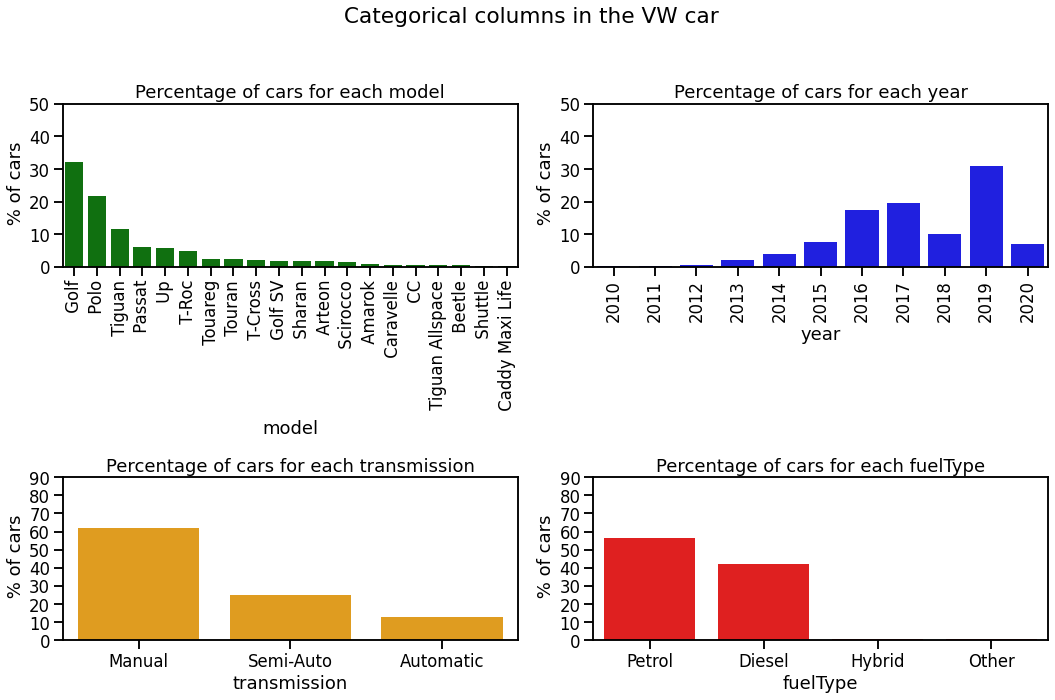

In [51]:
# function call and plot
sns.set_context("talk")  
# figure size  , width, height                                                       
plt.figure(figsize= (15,10))
# subplot (row, column, position)
plt.subplot(2,2,1)  
bar_plot(model_count,"model", " % of cars","green",np.arange(0,60,10), 90)  # np.arange (0, 60,10) to start form origin
                                                   
plt.subplot(2,2,2)
bar_plot(year_count,"year", " % of cars","blue",np.arange(0,60,10), 90) 
                                                  

plt.subplot(2,2,3)
bar_plot(transmission_count,"transmission", " % of cars", "orange",np.arange(0,100,10), 0) 

plt.subplot(2,2,4)
bar_plot(fuelType_count,"fuelType", " % of cars","red", np.arange(0,100,10), 0) 
# suptitle for super title
plt.suptitle(" Categorical columns in the VW car")  

# plt.tight_layout is used to overcome the overlap between title of the figure
plt.tight_layout(rect=[0, 0, 1, 0.90])                                                         
plt.show()   


**Remarks:**


*  Top 3 selling car models are Golf (32%),  polo (23%), Tiguan (12%)
*  The highest car was made in the 2019 year
* From 3 types of transmission car, the highest percentage of cars is Manual type and it is around 61%
* In this datset, most of the VW cars are Petrol based and second highest is Diesel (42%)



In [52]:
# statistics of the numerical variables
display(df.describe())

,year,price,mileage,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,188.300000,3.200000



**Assumption:**

1.   Car Price is in /$
2.   engineSize is in Litre

**Observations:**

*   The oldest car in the dataset is from 2000
*   The latest car is from 2020
*   The average price of each used car is $16839

*   The most expensive car price is $69994  

* the  cheapest car price is $899
*   The highest mpg is 188.3
*   Engine Size varies from 0 to 3.2L
*   The lowest mileage is 1 mile and highest mileage is 212000 miles







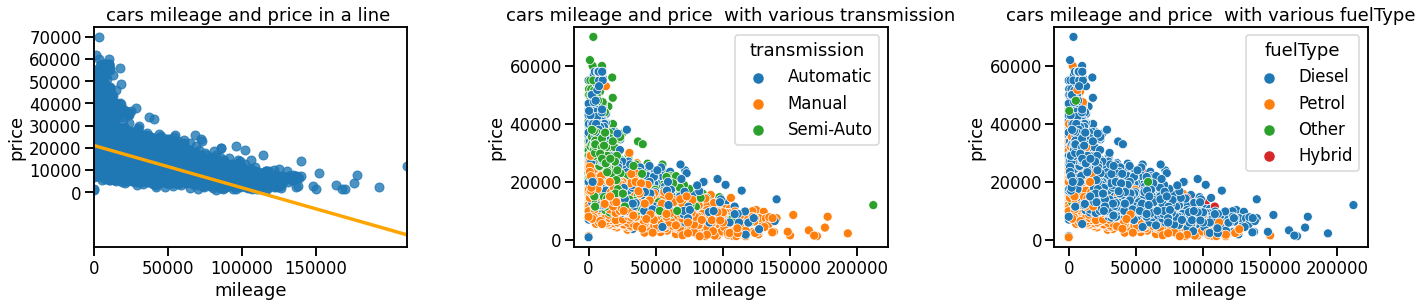

In [53]:
# working with numerical feature
# scatter plot
plt.figure(figsize=(20,12))
#  mileage vs price in a trend line
plt.subplot(3,3,1)
sns.regplot(x='mileage', y='price', data=df, line_kws={'color':'orange'})
plt.xticks(np.arange(0, 200000,50000)) 
plt.yticks(np.arange(0, 80000,10000)) 
plt.title("cars mileage and price in a line ")

# adding a categorical feature: 'transmission'
plt.subplot(3,3,2)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')
plt.title("cars mileage and price  with various transmission")

# adding a categorical feature: 'fuelType'

plt.subplot(3,3,3)
sns.scatterplot(x='mileage', y='price', data=df, hue='fuelType')
plt.title("cars mileage and price  with various fuelType")
plt.tight_layout()
plt.show()

**Observations:**
1.  From above figure, there is an inverse relation between mileage and price
2.  Manual type car is lower price than Automatic and semi-manual
3. Fuel : Diesel and Petrol are dominant feature than other and hybrid. The car driven by Diesel is higher price than driven by petrol














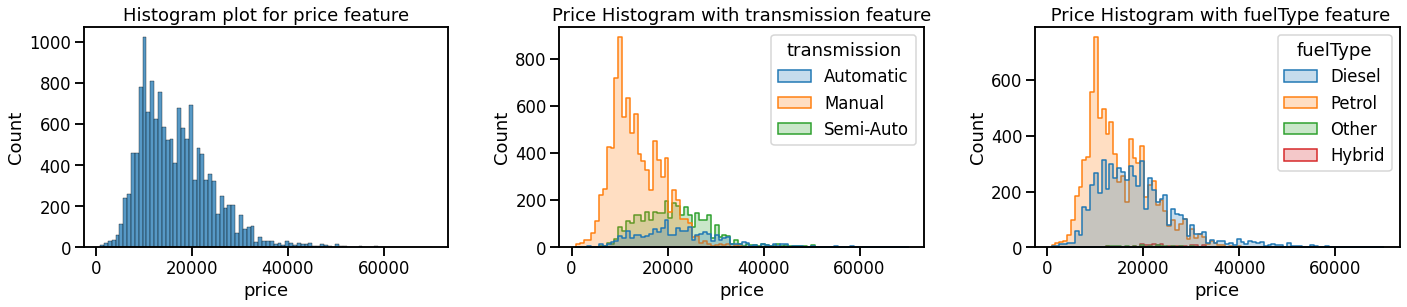

In [54]:
# histogram plot for price
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.histplot(data=df, x='price')
plt.title("Histogram plot for price feature")

plt.subplot(3,3,2)
sns.histplot(data=df, x='price', hue='transmission', element="step")
plt.title("Price Histogram with transmission feature")

plt.subplot(3,3,3)
sns.histplot(data=df, x='price', hue='fuelType', element="step")
plt.title(" Price Histogram with fuelType feature")

plt.tight_layout()
plt.show()

**Observations:** 

1.   From Price Histogram , it shows that the highest price count is 10000
2.   Transmission type for Manual car is highest count then semi-auto and automatic transmission in a same price
3. Petrol type fuel car is the highest with price range 10000 to 30000 than Diesel type fuel car in the same range



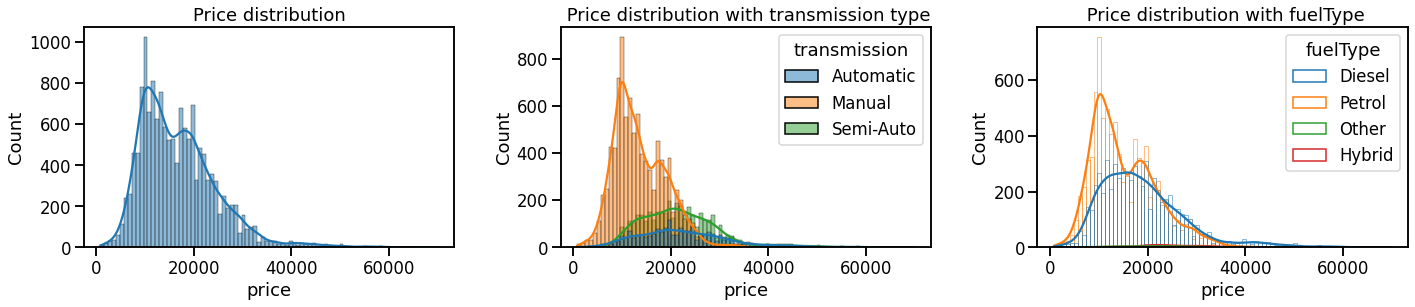

In [55]:
# distribution plot for price feature
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.histplot(data=df, x='price', kde=True)
plt.title("Price distribution")

plt.subplot(3,3,2)
sns.histplot(data=df, x='price', kde=True, hue='transmission')
plt.title(" Price distribution with transmission type")

plt.subplot(3,3,3)
sns.histplot(data=df, x='price',kde=True, hue='fuelType', fill=False)
plt.title(" Price distribution with fuelType")

plt.tight_layout()
plt.show()

**Observations :**

1. Price is bimodal distribution
2. Manual car price is bimodal, automatic and semi-automatic both are normally distributed
3. Petrol type car price is bimodal whereas Diesel type car is normally distributed



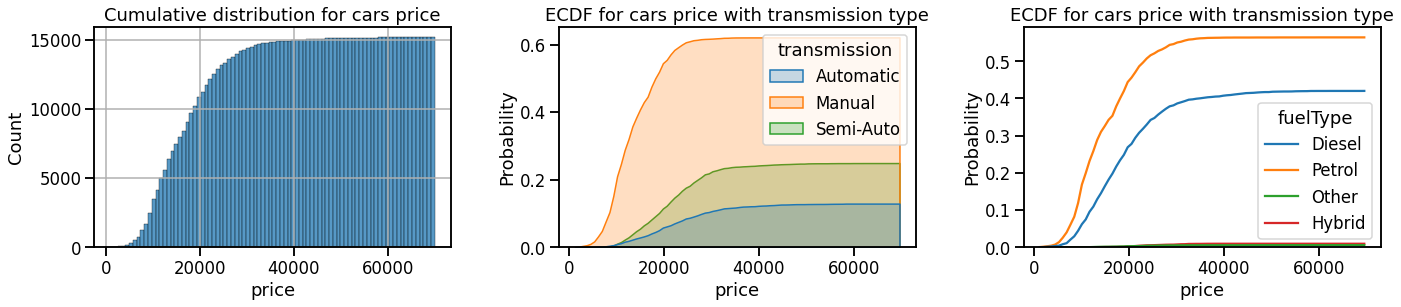

In [56]:
# ECDF plot for cars price

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.histplot(data=df, x='price', cumulative=True)
plt.grid()
plt.title("Cumulative distribution for cars price")

plt.subplot(3,3,2)
sns.histplot(data=df, x='price', cumulative=True, stat='probability', hue='transmission', element="poly")
plt.title("ECDF for cars price with transmission type")

plt.subplot(3,3,3)
sns.histplot(data=df, x='price', cumulative=True, stat='probability', hue='fuelType', element="poly", fill=False)
plt.title("ECDF for cars price with transmission type")

plt.tight_layout()
plt.show()


**Observations:**

1.   Cars price is 20000 almost for 10000 cars
2.   Probability for Manual car is higher than automatic and semi-automatic car for the same car price
3. Probability for petrol car is higher than Diesel car for the same car price



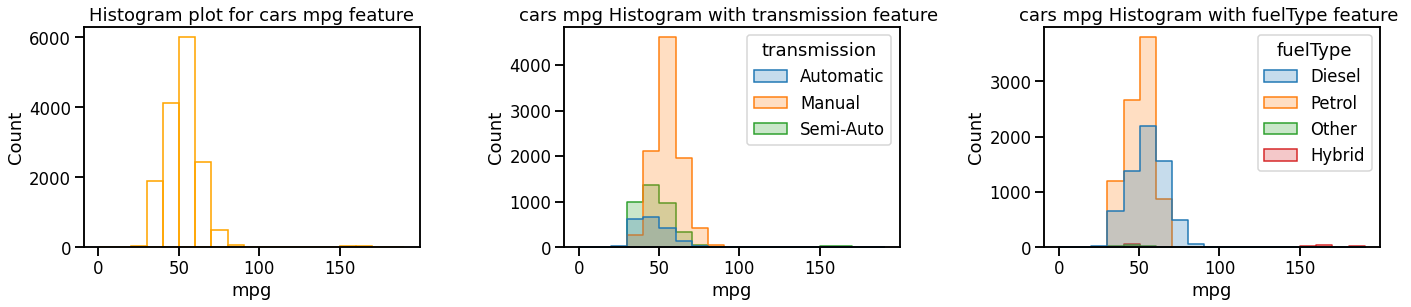

In [57]:
#histogram plot cars mpg feature
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.histplot(data=df, x='mpg', binwidth=10, color='orange', fill=False)
plt.title("Histogram plot for cars mpg feature")

plt.subplot(3,3,2)
sns.histplot(data=df, x='mpg', binwidth=10, hue='transmission', element="step")
plt.title("cars mpg Histogram with transmission feature ")

plt.subplot(3,3,3)
sns.histplot(data=df, x='mpg', binwidth=10, hue='fuelType', element="step")
plt.title("cars mpg Histogram with fuelType feature ")

plt.tight_layout()
plt.show()


**Observations :**

1.  the highest cars mpg count is 50 to 60 range
2.  cars mpg for manual type transmission is the highest and range is 50 to 60
3. cars mpg for petrol type fuel is highest range count




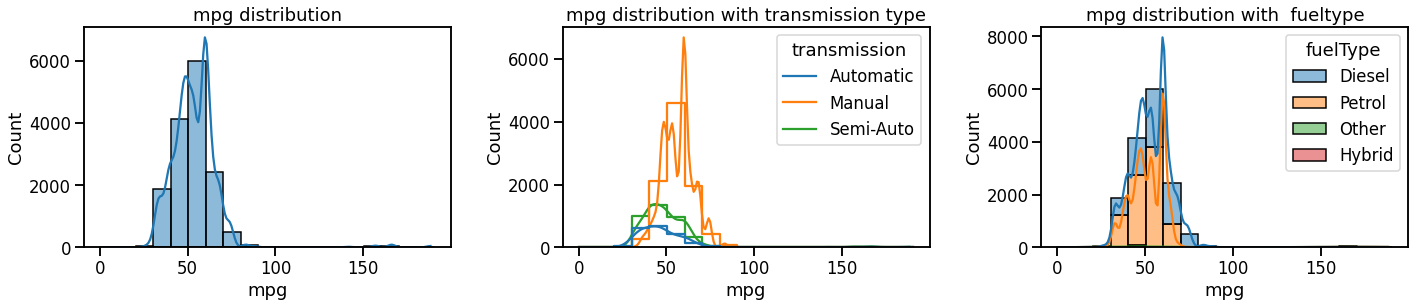

In [58]:
# distribution plot for cars mpg feature

plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.histplot(data=df, x='mpg', binwidth=10, kde=True)
plt.title("mpg distribution")

plt.subplot(3,3,2)
sns.histplot(data=df, x='mpg', binwidth=10, kde=True, hue='transmission',element="step", fill=False)
plt.title("mpg distribution with transmission type")

plt.subplot(3,3,3)
sns.histplot(data=df, x='mpg', binwidth=10, kde=True, hue='fuelType',multiple="stack")
plt.title("mpg distribution with  fueltype")

plt.tight_layout()
plt.show()

**Observations:**

1.   cars mpg is bimodal distribution
2.   Manual cars mpg is bimodal; on the other hand, automatic and semi-automatic cars mpg are normally distributed 
3. Fueltype cars distribution for cars mpg are  multimodal distribution



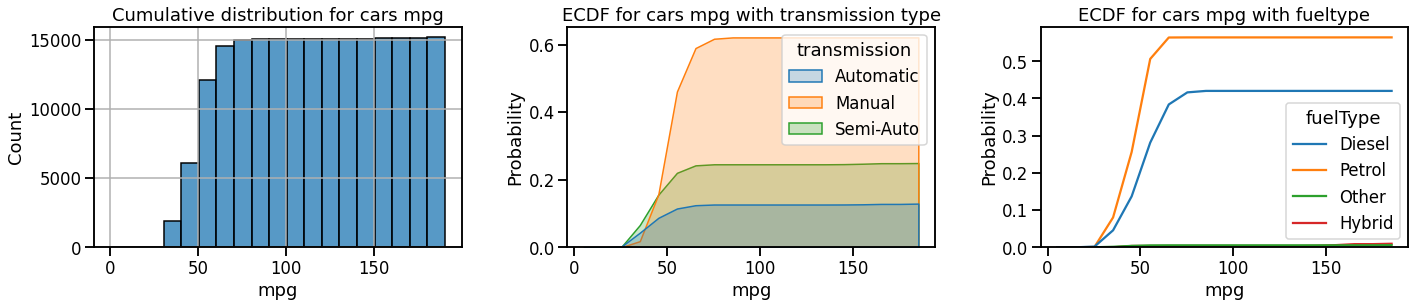

In [59]:
# ECDF plot for mpg feature
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.histplot(data=df, x='mpg', binwidth=10, cumulative=True)
plt.grid()
plt.title("Cumulative distribution for cars mpg")

plt.subplot(3,3,2)
sns.histplot(data=df, x='mpg', binwidth=10, cumulative=True, stat='probability', hue='transmission',  element="poly")
plt.title("ECDF for cars mpg with transmission type")

plt.subplot(3,3,3)
sns.histplot(data=df, x='mpg', binwidth=10, cumulative=True, stat='probability', hue='fuelType', element="poly", fill=False)
plt.title("ECDF for cars mpg with fueltype")

plt.tight_layout()
plt.show()


**Observations:**

1.   Cars mpg is 50 for almost 6000 cars
2.  Probability for Manual cars mpg is higher than automatic and semi-automatic cars mpg for the same car mpg
3. Probability for petrol cars mpg is higher than Diesel cars mpg for the same cars mpg






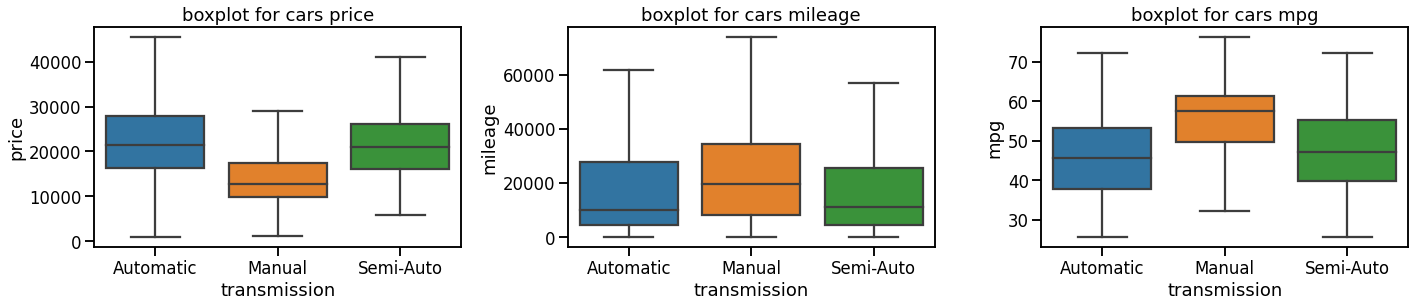

In [60]:
# boxplot for various numerical features
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.boxplot(y=df["price"], x=df['transmission'], showfliers=False)
plt.title("boxplot for cars price")

plt.subplot(3,3,2)
sns.boxplot(y=df["mileage"],x=df['transmission'], showfliers=False)
plt.title("boxplot for cars mileage")

plt.subplot(3,3,3)
sns.boxplot(y=df["mpg"],x=df['transmission'], showfliers=False)
plt.title("boxplot for cars mpg")

plt.tight_layout()
plt.show()

**Observations:** 

*   Price, mileage and mpg range are different for any type of transmission-cars.
*   Median or 50th percentile are same for Automatic and Semi-Auto cars for price, mileage and mpg.
* Price for Manual type of cars are lower and it's 50th percentile is 12000
* Median of mileage cars for Manual transmission cars are in 19000
* Inter quartile range of mpg for manual type cars are in between 63 tp 50.



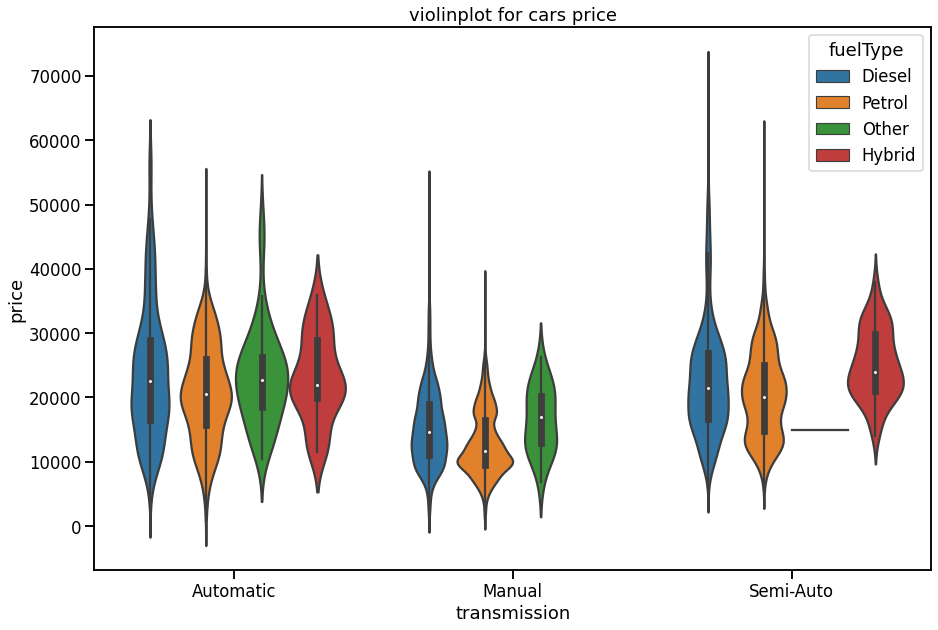

In [61]:
#violinplot for various numerical features
plt.figure(figsize=(15,10))

sns.violinplot(y=df["price"],x=df['transmission'],hue=df['fuelType'])
plt.title("violinplot for cars price")
plt.show()

**Observations:**


*   Price distribution for Automatic-cars driving by diesel are uniform, driving by other are normal distribution, whereas petrol and hybrid fuel-type cars have multiple peak in their price distribution.
*  Manual transmission cars which are run by other have uniform distribution; on the othe hand diesel-car distribution is normal but pertrol's car have multiple peak in their price distribution.
* Semi-Auto's price distribution are different with each other where diesel type cars are uniform distribution, petrol and hybrid are multimodal distribution.

